In [1]:
%matplotlib inline
import nengo
import numpy as np
import nengo_spa as spa
from spatial_semantic_pointers.utils import power, encode_point, make_good_unitary, get_axes, \
    generate_region_vector, get_heatmap_vectors, power, make_fixed_dim_periodic_axis, make_optimal_periodic_axis
import matplotlib.pyplot as plt

In [41]:
def orthogonal_dir_unitary_angle(dim=5, phi=np.pi/2., angle=0):
    xf = np.zeros((dim,), dtype='Complex64')
    xf[0] = 1
    xf[1] = np.exp(1.j * phi * np.cos(angle))
    xf[2] = np.exp(1.j * phi * np.sin(angle))
    xf[3] = np.conj(xf[2])
    xf[4] = np.conj(xf[1])

    yf = np.zeros((dim,), dtype='Complex64')
    yf[0] = 1
    yf[1] = np.exp(1.j * phi * np.cos(angle + np.pi/2.))
    yf[2] = np.exp(1.j * phi * np.sin(angle + np.pi/2.))
    yf[3] = np.conj(yf[2])
    yf[4] = np.conj(yf[1])

    X = np.fft.ifft(xf).real
    Y = np.fft.ifft(yf).real

    # checks to make sure everything worked correctly
    assert np.allclose(np.abs(xf), 1)
    assert np.allclose(np.abs(yf), 1)
    assert np.allclose(np.fft.fft(X), xf)
    assert np.allclose(np.fft.fft(Y), yf)
    assert np.allclose(np.linalg.norm(X), 1)
    assert np.allclose(np.linalg.norm(Y), 1)

    return X, Y

def plot_1d(X, xs):
    sim = np.zeros((len(xs),))
    for i, x in enumerate(xs):
        sim[i] = power(X, x).v[0]
    plt.imshow(sim)

def plot_2d(X, Y, xs, ys, vmin=None, vmax=None):
    sim = np.zeros((len(xs),len(ys)))
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            sim[i,j] = encode_point(x, y, X, Y).v[0]
    plt.imshow(sim, vmin=vmin, vmax=vmax)

/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':


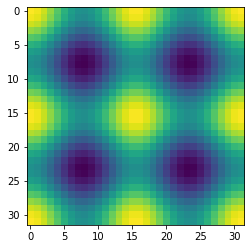

In [8]:
dim = 5
limit = 4
res = 32
xs = np.linspace(-limit, limit, res)
ys = np.linspace(-limit, limit, res)
X, Y = orthogonal_dir_unitary_angle(phi=np.pi/2.)
plot_2d(spa.SemanticPointer(data=X), spa.SemanticPointer(data=Y), xs, ys)

/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':


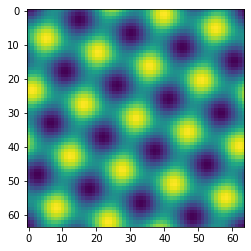

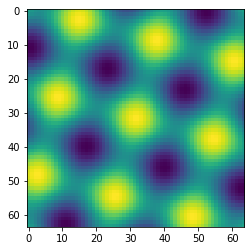

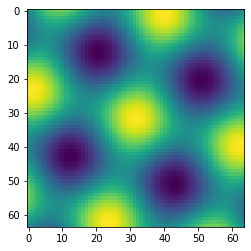

In [18]:
dim = 5
limit = 8
res = 64
angle = np.pi/12.#0
xs = np.linspace(-limit, limit, res)
ys = np.linspace(-limit, limit, res)
for phi in [np.pi/2., np.pi/3., np.pi/4.]:
    X, Y = orthogonal_dir_unitary_angle(phi=phi, angle=angle)
    plt.figure()
    plot_2d(spa.SemanticPointer(data=X), spa.SemanticPointer(data=Y), xs, ys)

Now look at hexagonal stuff

starting with just ignoring that extra dimension

In [19]:
def orthogonal_dir_7dim(dim=7, phi=np.pi/2., angle=0):
    xf = np.zeros((dim,), dtype='Complex64')
    xf[0] = 1
    xf[1] = np.exp(1.j * phi * np.cos(angle))
    xf[2] = np.exp(1.j * phi * np.sin(angle))
    xf[3] = np.exp(1.j * phi * 0)
    xf[4] = np.conj(xf[3])
    xf[5] = np.conj(xf[2])
    xf[6] = np.conj(xf[1])

    yf = np.zeros((dim,), dtype='Complex64')
    yf[0] = 1
    yf[1] = np.exp(1.j * phi * np.cos(angle + np.pi/2.))
    yf[2] = np.exp(1.j * phi * np.sin(angle + np.pi/2.))
    yf[3] = np.exp(1.j * phi * 0)
    yf[4] = np.conj(yf[3])
    yf[5] = np.conj(yf[2])
    yf[6] = np.conj(yf[1])

    X = np.fft.ifft(xf).real
    Y = np.fft.ifft(yf).real

    # checks to make sure everything worked correctly
    assert np.allclose(np.abs(xf), 1)
    assert np.allclose(np.abs(yf), 1)
    assert np.allclose(np.fft.fft(X), xf)
    assert np.allclose(np.fft.fft(Y), yf)
    assert np.allclose(np.linalg.norm(X), 1)
    assert np.allclose(np.linalg.norm(Y), 1)

    return X, Y

/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()


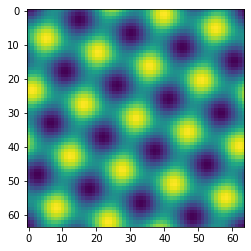

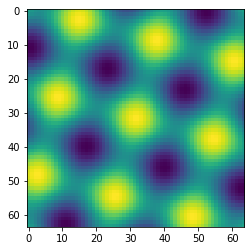

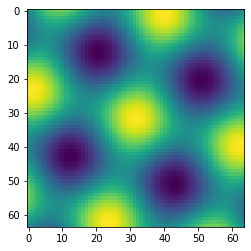

In [20]:
dim = 7
limit = 8
res = 64
angle = np.pi/12.#0
xs = np.linspace(-limit, limit, res)
ys = np.linspace(-limit, limit, res)
for phi in [np.pi/2., np.pi/3., np.pi/4.]:
    X, Y = orthogonal_dir_7dim(phi=phi, angle=angle)
    plt.figure()
    plot_2d(spa.SemanticPointer(data=X), spa.SemanticPointer(data=Y), xs, ys)

looks the same as expected

In [30]:
def orthogonal_hex_dir_7dim(dim=7, phi=np.pi/2., angle=0):
    xf = np.zeros((dim,), dtype='Complex64')
    xf[0] = 1
    xf[1] = np.exp(1.j * phi)
    xf[2] = 1
    xf[3] = 1
    xf[4] = np.conj(xf[3])
    xf[5] = np.conj(xf[2])
    xf[6] = np.conj(xf[1])

    yf = np.zeros((dim,), dtype='Complex64')
    yf[0] = 1
    yf[1] = 1
    yf[2] = np.exp(1.j * phi)
    yf[3] = 1
    yf[4] = np.conj(yf[3])
    yf[5] = np.conj(yf[2])
    yf[6] = np.conj(yf[1])
    
    zf = np.zeros((dim,), dtype='Complex64')
    zf[0] = 1
    zf[1] = 1
    zf[2] = 1
    zf[3] = np.exp(1.j * phi)
    zf[4] = np.conj(zf[3])
    zf[5] = np.conj(zf[2])
    zf[6] = np.conj(zf[1])

    Xh = np.fft.ifft(xf).real
    Yh = np.fft.ifft(yf).real
    Zh = np.fft.ifft(zf).real

    # checks to make sure everything worked correctly
    assert np.allclose(np.abs(xf), 1)
    assert np.allclose(np.abs(yf), 1)
    assert np.allclose(np.fft.fft(Xh), xf)
    assert np.allclose(np.fft.fft(Yh), yf)
    assert np.allclose(np.linalg.norm(Xh), 1)
    assert np.allclose(np.linalg.norm(Yh), 1)
    
    axis_sps = [
        spa.SemanticPointer(data=Xh),
        spa.SemanticPointer(data=Yh),
        spa.SemanticPointer(data=Zh),
    ]
    # random unitaries for the axes don't look good
#     axis_sps = [
#         make_good_unitary(dim=7),
#         make_good_unitary(dim=7),
#         make_good_unitary(dim=7),
#     ]
    n = 3
    points_nd = np.eye(n) #* np.sqrt(n)
    # points in 2D that will correspond to each axis, plus one at zero
    points_2d = np.zeros((n, 2))
    thetas = np.linspace(0, 2 * np.pi, n + 1)[:-1] + angle
    # TODO: will want a scaling here, or along the high dim axes
    for i, theta in enumerate(thetas):
        points_2d[i, 0] = np.cos(theta)
        points_2d[i, 1] = np.sin(theta)

    transform_mat = np.linalg.lstsq(points_2d, points_nd)

    x_axis = transform_mat[0][0, :]
    y_axis = transform_mat[0][1, :]
    
    X = power(axis_sps[0], x_axis[0])
    Y = power(axis_sps[0], y_axis[0])
    for i in range(1, n):
        X *= power(axis_sps[i], x_axis[i])
        Y *= power(axis_sps[i], y_axis[i])

    return X, Y

/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitl

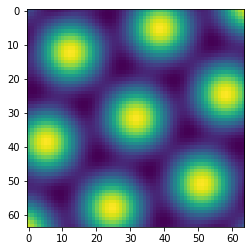

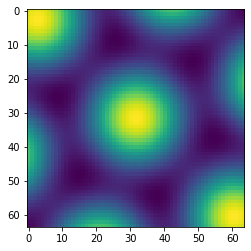

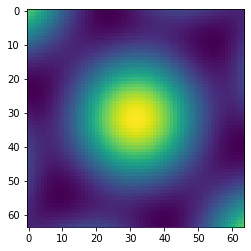

In [31]:
dim = 7
limit = 8
res = 64
angle = np.pi/12.#0
xs = np.linspace(-limit, limit, res)
ys = np.linspace(-limit, limit, res)
for phi in [np.pi/2., np.pi/3., np.pi/4.]:
    X, Y = orthogonal_hex_dir_7dim(phi=phi, angle=angle)
    plt.figure()
#     plot_2d(spa.SemanticPointer(data=X), spa.SemanticPointer(data=Y), xs, ys)
    plot_2d(X, Y, xs, ys)

In [93]:
def orthogonal_nd_proj(dim=7, phi=np.pi/2., angle=0):
    # maximum possible value for n
    n = (dim - 1) // 2
    # make an axis for each n
    axes_f = np.zeros((n, dim), dtype='Complex64')
    axes = np.zeros((n, dim,))
    axis_sps = []
    for k in range(n):
        axes_f[k, :] = 1
        axes_f[k, k+1] = np.exp(1.j * phi)
        axes_f[k, -(k+1)] = np.conj(axes_f[k, k+1])
        axes[k, :] = np.fft.ifft(axes_f[k, :]).real
        
        assert np.allclose(np.abs(axes_f[k, :]), 1)
        assert np.allclose(np.fft.fft(axes[k, :]), axes_f[k, :])
        assert np.allclose(np.linalg.norm(axes[k, :]), 1)
        
        axis_sps.append(spa.SemanticPointer(data=axes[k, :]))

    points_nd = np.eye(n) * np.sqrt(n)
    # points in 2D that will correspond to each axis, plus one at zero
    points_2d = np.zeros((n, 2))
    thetas = np.linspace(0, 2 * np.pi, n + 1)[:-1] + angle
    # TODO: will want a scaling here, or along the high dim axes
    for i, theta in enumerate(thetas):
        points_2d[i, 0] = np.cos(theta)
        points_2d[i, 1] = np.sin(theta)

    transform_mat = np.linalg.lstsq(points_2d, points_nd)

    x_axis = transform_mat[0][0, :] #/ transform_mat[3][0]
    y_axis = transform_mat[0][1, :] #/ transform_mat[3][1]
    sv = transform_mat[3][0]
    
    X = power(axis_sps[0], x_axis[0])
    Y = power(axis_sps[0], y_axis[0])
    for i in range(1, n):
        X *= power(axis_sps[i], x_axis[i])
        Y *= power(axis_sps[i], y_axis[i])

    return X, Y, sv

/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """
/home/ctnuser/anaconda3/envs/py3conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


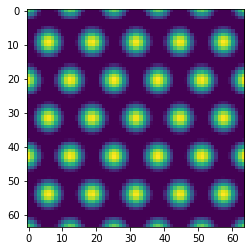

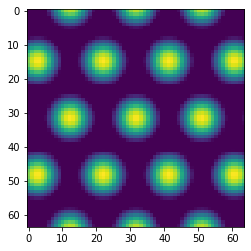

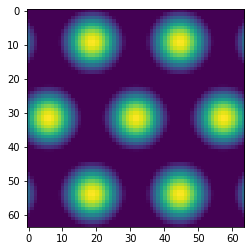

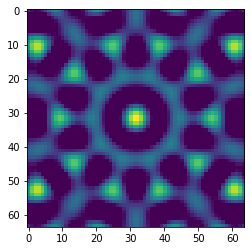

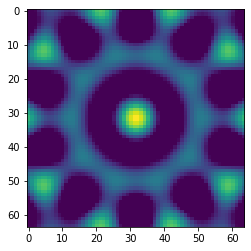

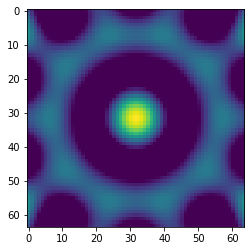

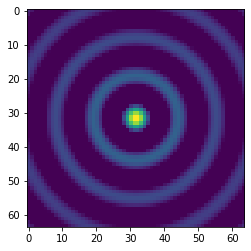

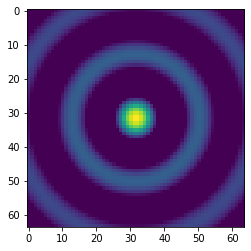

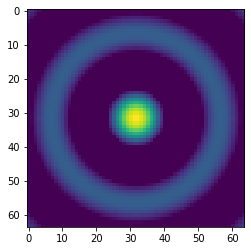

In [102]:
dims = [7, 11, 513]
limit = 8
res = 64
angle = 0#np.pi/12.#0
xs = np.linspace(-limit, limit, res)
ys = np.linspace(-limit, limit, res)
for dim in dims:
#     for phi in [np.pi/2., np.pi/3., np.pi/4.]:
    for phi in [np.pi/2, np.pi/3., np.pi/4.]:
        X, Y, sv = orthogonal_nd_proj(dim=dim, phi=phi, angle=angle)
#         print(sv)
        plt.figure()
        plot_2d(X, Y, xs*sv, ys*sv, vmin=0, vmax=None)